In [2]:
import pandas as pd
from scipy.stats import zscore

# Load the dataset from a local path
data = pd.read_excel('/Users/marclambertes/Downloads/Wyscout/SWE.xlsx')

# Define metrics for each role and weights based on available dataset
roles_metrics_weights = {
    "Finisher": {"Goals": 0.2, "xG": 0.2, "Shots per 90": 0.2, "Shots on target, %": 0.2, "Goal conversion, %": 0.2},
    "Target": {"Aerial duels won, %": 0.2, "Goals": 0.2, "Head goals": 0.2, "xG": 0.2, "Touches in box per 90": 0.2},
    "Roamer": {"Dribbles per 90": 0.2, "Successful dribbles, %": 0.2, "Touches in box per 90": 0.2, "Progressive runs per 90": 0.2, "Accelerations per 90": 0.2},
    "Wide Threat": {"Crosses per 90": 0.2, "Accurate crosses, %": 0.2, "Dribbles per 90": 0.2, "Progressive runs per 90": 0.2, "Touches in box per 90": 0.2},
    "Unlocker": {"Key passes per 90": 0.2, "Smart passes per 90": 0.2, "Accurate smart passes, %": 0.2, "Passes to penalty area per 90": 0.2, "Accurate passes to penalty area, %": 0.2},
    "Outlet": {"Touches in box per 90": 0.2, "Progressive runs per 90": 0.2, "Received passes per 90": 0.2, "Fouls suffered per 90": 0.2, "Dribbles per 90": 0.2},
    "Box Crasher": {"Goals": 0.2, "xG": 0.2, "Touches in box per 90": 0.2, "Shots per 90": 0.2, "Progressive runs per 90": 0.2},
    "Creator": {"Key passes per 90": 0.2, "Shot assists per 90": 0.2, "Smart passes per 90": 0.2, "Passes to final third per 90": 0.2, "Accurate passes to final third, %": 0.2},
    "Orchestrator": {"Passes per 90": 0.2, "Accurate passes, %": 0.2, "Forward passes per 90": 0.2, "Accurate forward passes, %": 0.2, "Progressive passes per 90": 0.2},
    "Box to Box": {"Defensive duels per 90": 0.2, "Defensive duels won, %": 0.2, "Progressive runs per 90": 0.2, "Goals": 0.2, "Assists": 0.2},
    "Distributor": {"Passes per 90": 0.2, "Accurate passes, %": 0.2, "Long passes per 90": 0.2, "Accurate long passes, %": 0.2, "Progressive passes per 90": 0.2},
    "Builder": {"Passes per 90": 0.2, "Accurate passes, %": 0.2, "Defensive duels won, %": 0.2, "Interceptions per 90": 0.2, "Progressive passes per 90": 0.2},
    "Overlapper": {"Crosses per 90": 0.2, "Accurate crosses, %": 0.2, "Dribbles per 90": 0.2, "Progressive runs per 90": 0.2, "Passes to penalty area per 90": 0.2},
    "Progressor": {"Progressive passes per 90": 0.2, "Accurate progressive passes, %": 0.2, "Dribbles per 90": 0.2, "Progressive runs per 90": 0.2, "Touches in box per 90": 0.2},
    "Safety": {"Defensive duels won, %": 0.2, "Interceptions per 90": 0.2, "Accurate passes, %": 0.2, "Shots blocked per 90": 0.2, "Aerial duels won, %": 0.2},
    "Aggressor": {"Defensive duels per 90": 0.2, "Sliding tackles per 90": 0.2, "Interceptions per 90": 0.2, "Fouls per 90": 0.2, "Shots blocked per 90": 0.2},
    "Spreader": {"Long passes per 90": 0.25, "Accurate long passes, %": 0.25, "Progressive passes per 90": 0.25, "Accurate progressive passes, %": 0.25},
    "Anchor": {"Defensive duels won, %": 0.2, "Interceptions per 90": 0.2, "Shots blocked per 90": 0.2, "Aerial duels won, %": 0.2, "Accurate passes, %": 0.2}
}

# Standardize (Z-score) relevant metrics
def standardize_metrics(data, metrics):
    standardized = {}
    for metric in metrics:
        if metric in data.columns:
            standardized[metric] = zscore(data[metric].fillna(0))
        else:
            print(f"Metric '{metric}' not found in dataset.")
    return pd.DataFrame(standardized)

# Calculate role scores
def calculate_role_scores(data, role_definitions):
    role_scores = {}
    for role, metrics_weights in role_definitions.items():
        metrics = metrics_weights.keys()
        weights = metrics_weights.values()

        # Standardize metrics for the role
        standardized = standardize_metrics(data, metrics)

        # Compute weighted Z-scores for the role
        if not standardized.empty:
            role_scores[role] = standardized.dot(list(weights))

    return pd.DataFrame(role_scores)

# Compute scores for all roles
role_scores = calculate_role_scores(data, roles_metrics_weights)

# Combine role scores with player names and teams
final_scores = pd.concat([data[["Player", "Team"]], role_scores], axis=1)

# Save results to an Excel file
output_path = 'player_role_scores.xlsx'
final_scores.to_excel(output_path, index=False)

print(f"Role scores calculated and saved to {output_path}.")


Role scores calculated and saved to player_role_scores.xlsx.


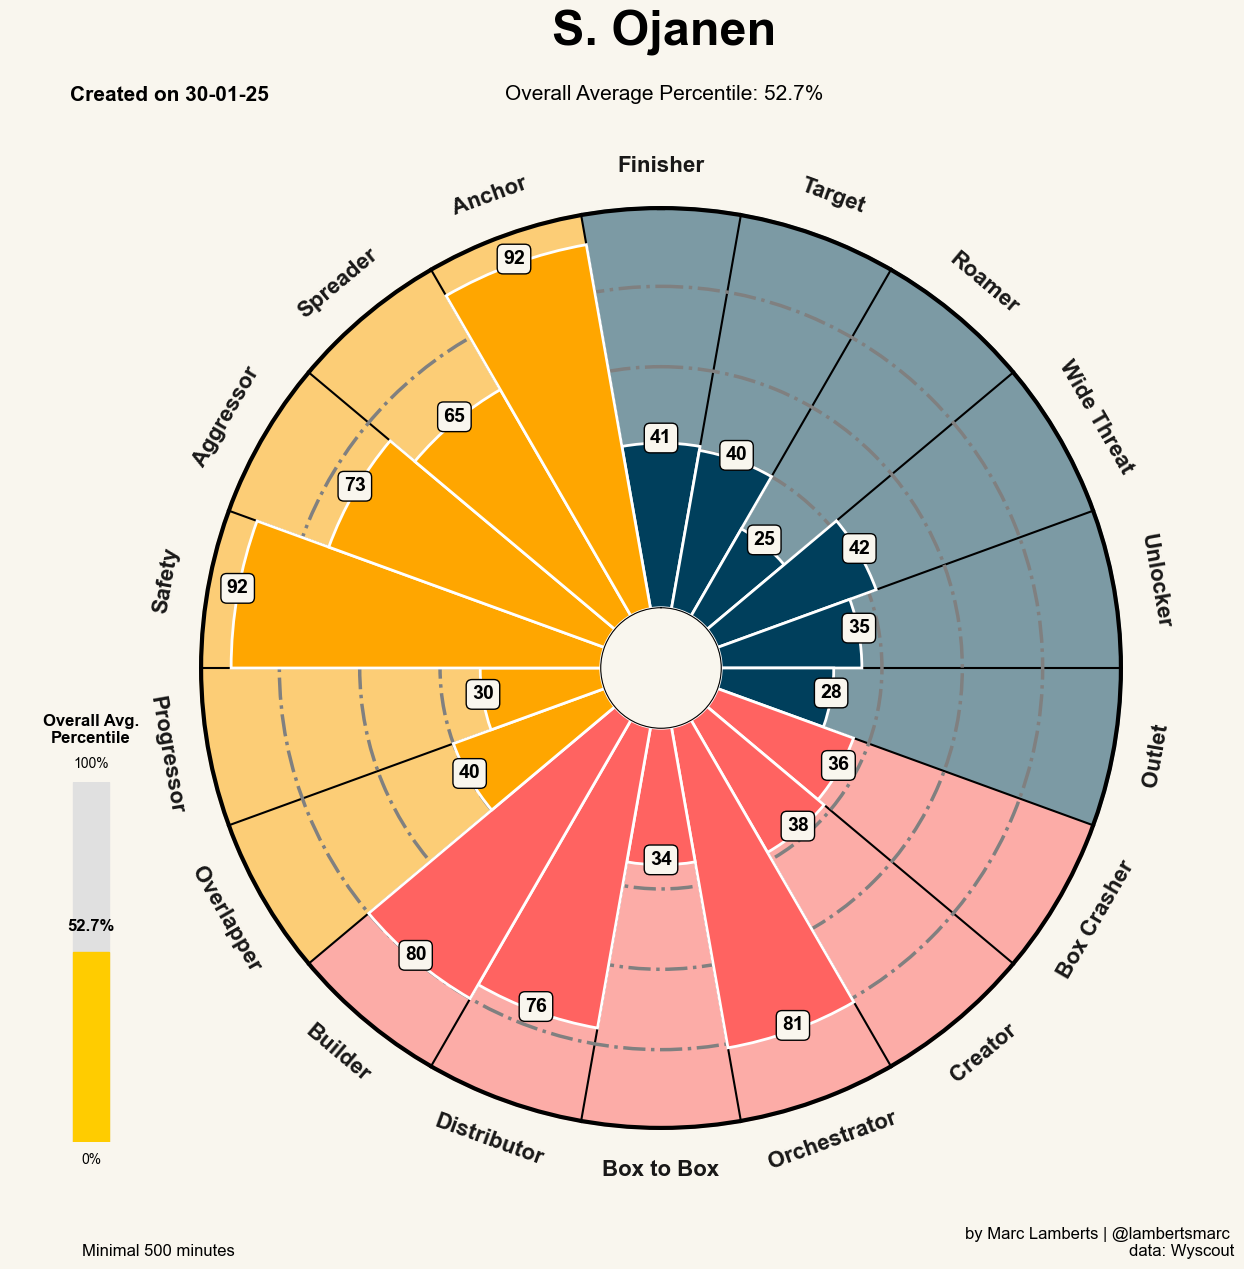

In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
from mplsoccer import PyPizza, add_image
from datetime import datetime
from matplotlib.patches import Rectangle

# Load the Excel file (adjust the file path if needed)
file_path = 'player_role_scores.xlsx'
df = pd.read_excel(file_path)

# Set the player's name for analysis
player_name = "S. Ojanen"

# Check if the player exists in the dataset
if player_name not in df['Player'].values:
    raise ValueError(f"Player {player_name} not found in the dataset.")

# Filter data for the player
player_data = df[df['Player'] == player_name].reset_index(drop=True)

# List of role columns to calculate percentiles for
role_columns = df.columns[2:]

# Calculate the percentile ranks for each role score for the player
percentile_ranks = [math.floor(stats.percentileofscore(df[column], player_data[column].values[0])) for column in role_columns]
percentile_ranks = [99 if rank == 100 else rank for rank in percentile_ranks]  # Handle the 100 percentile case

# Calculate the overall average percentile
average_percentile = round(np.mean(percentile_ranks), 1)

# Initialize PyPizza for plotting
baker = PyPizza(
    params=role_columns.tolist(),
    straight_line_color="black",
    straight_line_lw=1.5,
    last_circle_lw=6,
    other_circle_lw=2.5,
    other_circle_ls="-.",
    inner_circle_size=15
)

# Slice colors and text colors
slice_colors = ["#003f5c"] * 6 + ["#ff6361"] * 6 + ["#ffa600"] * 6
text_colors = ["#000000"] * 8 + ["white"] * 5

# Plot pizza
fig, ax = baker.make_pizza(
    percentile_ranks,
    figsize=(12, 12),
    param_location=110,
    color_blank_space="same",
    slice_colors=slice_colors,
    kwargs_slices=dict(
        edgecolor="white",
        zorder=2,
        linewidth=2
    ),
    kwargs_params=dict(
        color="black", fontsize=16, weight='bold', fontname="Arial",
        va="center", alpha=.9
    ),
    kwargs_values=dict(
        color="black", fontsize=14, weight='bold', fontname="Arial",
        zorder=3,
        bbox=dict(
            edgecolor="black",
            facecolor="#F9F6EE",
            boxstyle="round,pad=0.3",
            lw=1
        )
    )
)

# Set background to white
fig.patch.set_facecolor('#F9F6EE')
ax.set_facecolor('#F9F6EE')

# Add title and subtitle
fig.text(
    0.515,
    0.97,
    f"{player_name}\n",
    size=35,
    ha="center",
    color="black",
    weight="bold",
    fontname="Arial",
)
fig.text(
    0.515, 0.95, 
    f"Overall Average Percentile: {average_percentile}%\n",
    size=15, ha="center", color="black", fontname="Arial"
)

# Footer text
fig.text(0.03, 0.005, "Minimal 500 minutes", size=12, color="black", fontname="Arial")
fig.text(0.99, 0.005, "by Marc Lamberts | @lambertsmarc \ndata: Wyscout", size=12, color="black", ha="right", fontname="Arial")

# Add overall average percentile bar graph
bar_ax = fig.add_axes([-0.03, 0.1, 0.15, 0.3])  # Adjusted position to move the bar further left
bar_ax.set_xlim(0, 1)  # Dummy x-axis to maintain aspect ratio
bar_ax.set_ylim(0, 100)  # Percentile range (0-100%)
bar_ax.axis("off")  # Hide axis

# Determine bar color based on percentile
if average_percentile >= 75:
    bar_color = "#00cc00"  # Green for high performance
elif 50 <= average_percentile < 75:
    bar_color = "#ffcc00"  # Yellow for medium performance
else:
    bar_color = "#ff0000"  # Red for low performance

# Draw the background bar for the full range (0-100%)
bar_ax.add_patch(Rectangle(
    (0.35, 0),  # Bottom-left corner (aligned with the new position)
    width=0.2,  # Bar width
    height=100,  # Full height
    color="#e0e0e0",  # Light gray for background
    zorder=1  # Behind the filled bar
))

# Draw the filled bar for the average percentile
bar_ax.add_patch(Rectangle(
    (0.35, 0),  # Bottom-left corner of the filled section (aligned with the new position)
    width=0.2,  # Bar width
    height=average_percentile,  # Filled height
    color=bar_color,  # Dynamic bar color
    zorder=2  # In front of the background
))

# Add text above the filled bar (percentage value in black)
bar_ax.text(
    0.45,  # Centered horizontally over the bar
    average_percentile + 5,  # Slightly above the bar
    f"{average_percentile}%",  # Display the percentile value
    ha="center", va="bottom",  # Align horizontally and vertically
    fontsize=12, weight="bold", fontname="Arial", color="black"  # Black text for readability
)

# Add labels for 0% and 100% at the bottom and top of the bar graph
bar_ax.text(0.45, -5, "0%", ha="center", va="center", fontsize=10, color="black", fontname="Arial")
bar_ax.text(0.45, 105, "100%", ha="center", va="center", fontsize=10, color="black", fontname="Arial")

# Add title for the bar graph
bar_ax.text(
    0.45, 110,  # Position above the bar graph
    "Overall Avg.\nPercentile",  # Title text
    ha="center", va="bottom",  # Align center and below the title
    fontsize=12, weight="bold", fontname="Arial", color="black"
)

# Add date and save figure
today_date = datetime.today().strftime("%d-%m-%y")
fig.text(0.02, 0.98, f"Created on {today_date}", size=15, color="black", fontname="Arial", ha="left", va="top", weight="bold")
plt.savefig('player_pizza_chart_S_Ojanen.png', dpi=500, bbox_inches='tight', facecolor='#F9F6EE')
plt.show()
